In [1]:
import os
import sonia
from sonnia.sonnia import SoNNia
from sonia.plotting import Plotter
from sonia.evaluate_model import EvaluateModel
from sonia.sequence_generation import SequenceGeneration
import numpy as np
import pandas as pd

# load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = list(pd.read_csv('data_seqs.csv.gz').values.astype(np.str))
data_seqs[:3]

[array(['CASSKQGASEAFF', 'TRBV7-8', 'TRBJ1-1'], dtype='<U26'),
 array(['CASSPPPNYGYTF', 'TRBV6-1', 'TRBJ1-2'], dtype='<U26'),
 array(['CASSTDTTEAFF', 'TRBV6-5', 'TRBJ1-1'], dtype='<U26')]

# define and infer model

In [3]:
qm = SoNNia(data_seqs=data_seqs,chain_type='humanTRB')

  0%|          | 748/200000 [00:00<00:26, 7478.12it/s]

Encode data.


100%|██████████| 200000/200000 [00:20<00:00, 9836.69it/s] 


In [4]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(5e5)) 

  0%|          | 1674/500000 [00:00<01:02, 8007.64it/s]

Generate sequences.


  0%|          | 2103/500000 [00:00<00:48, 10259.86it/s]

Encode gen.


100%|██████████| 500000/500000 [00:46<00:00, 10801.27it/s]


In [11]:
#define and train model
qm.infer_selection(epochs=30,batch_size=int(1e4))

# do some plotting

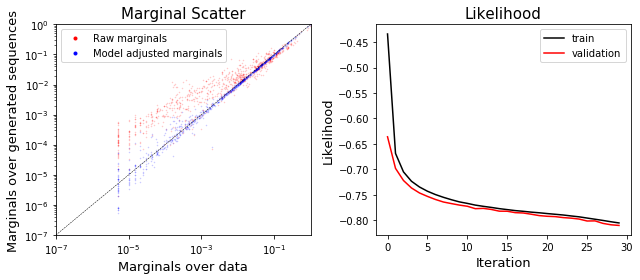

In [12]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

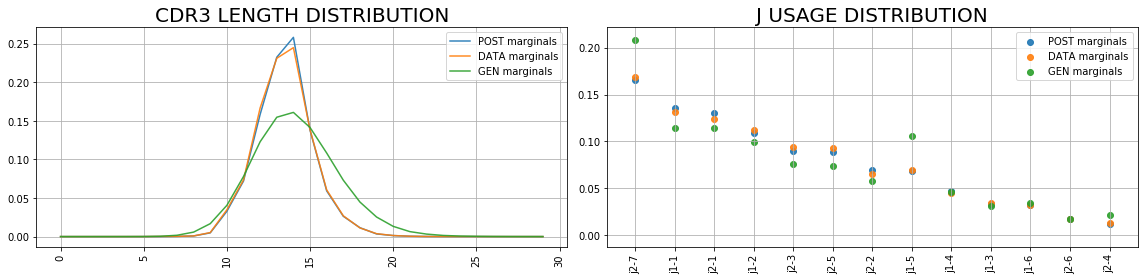

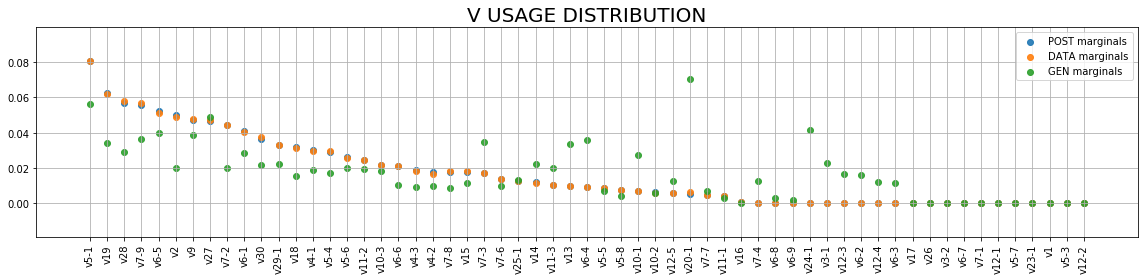

In [13]:
plot_sonia.plot_vjl()

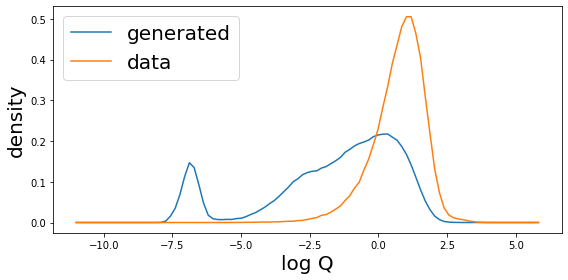

In [14]:
plot_sonia.plot_logQ()

# Generate sequences

In [15]:
gn=SequenceGeneration(qm)

In [16]:
pre_seqs=gn.generate_sequences_pre(int(1e4))
pre_seqs[:3]

[['CAVPTPYEQYF', 'TRBV10-3', 'TRBJ2-7', 'TGTGCCGTTCCGACGCCCTACGAGCAGTACTTC'],
 ['CASSQDRGSSPYEQYF',
  'TRBV14',
  'TRBJ2-7',
  'TGTGCCAGCAGCCAAGACCGAGGTTCGTCCCCCTACGAGCAGTACTTC'],
 ['CATIRGTPVEKLFF',
  'TRBV24-1',
  'TRBJ1-4',
  'TGTGCCACCATCCGAGGGACGCCGGTGGAAAAACTGTTTTTT']]

In [17]:
post_seqs=gn.generate_sequences_post(int(1e4))
post_seqs[:3]

array([['CASSDRTISNEKLFF', 'TRBV9', 'TRBJ1-4',
        'TGTGCCAGCAGCGACAGGACGATAAGTAATGAAAAACTGTTTTTT'],
       ['CANGDSYEQYF', 'TRBV19', 'TRBJ2-7',
        'TGTGCCAACGGGGACAGCTACGAGCAGTACTTC'],
       ['CASSTGGYTEAFF', 'TRBV28', 'TRBJ1-1',
        'TGTGCCAGCAGCACGGGGGGATACACTGAAGCTTTCTTT']], dtype='<U93')

# Evaluate sequences

In [18]:
ev=EvaluateModel(qm)

In [19]:
Q_data,pgen_data,ppost_data=ev.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=ev.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=ev.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[2.3917117 0.501221  6.164442 ]
[8.70570460e-11 1.00738792e-08 2.30814040e-08]
[2.08215356e-10 5.04923983e-09 1.42283978e-07]


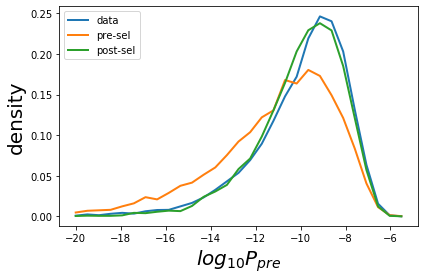

In [20]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

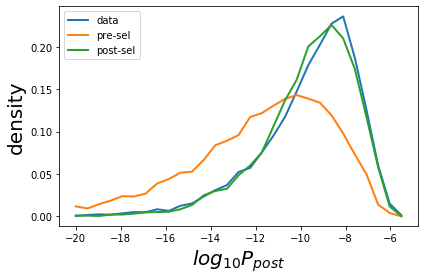

In [21]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

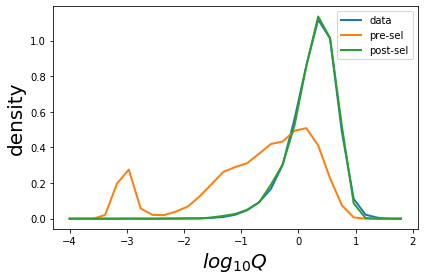

In [22]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils inherited from OLGA

In [17]:
# olga classes can be directly inspected in the main SoNNia model

In [23]:
qm.seq_gen_model.gen_rnd_prod_CDR3()

('TGCAGCGTGCCCAGATTCCAGCCCCAGCATTTT', 'CSVPRFQPQHF', 36, 4)

In [24]:
qm.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [25]:
qm.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])